In [45]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.simplefilter("ignore")

BECKER-WIEDEMANN_Uli-2_short.wav


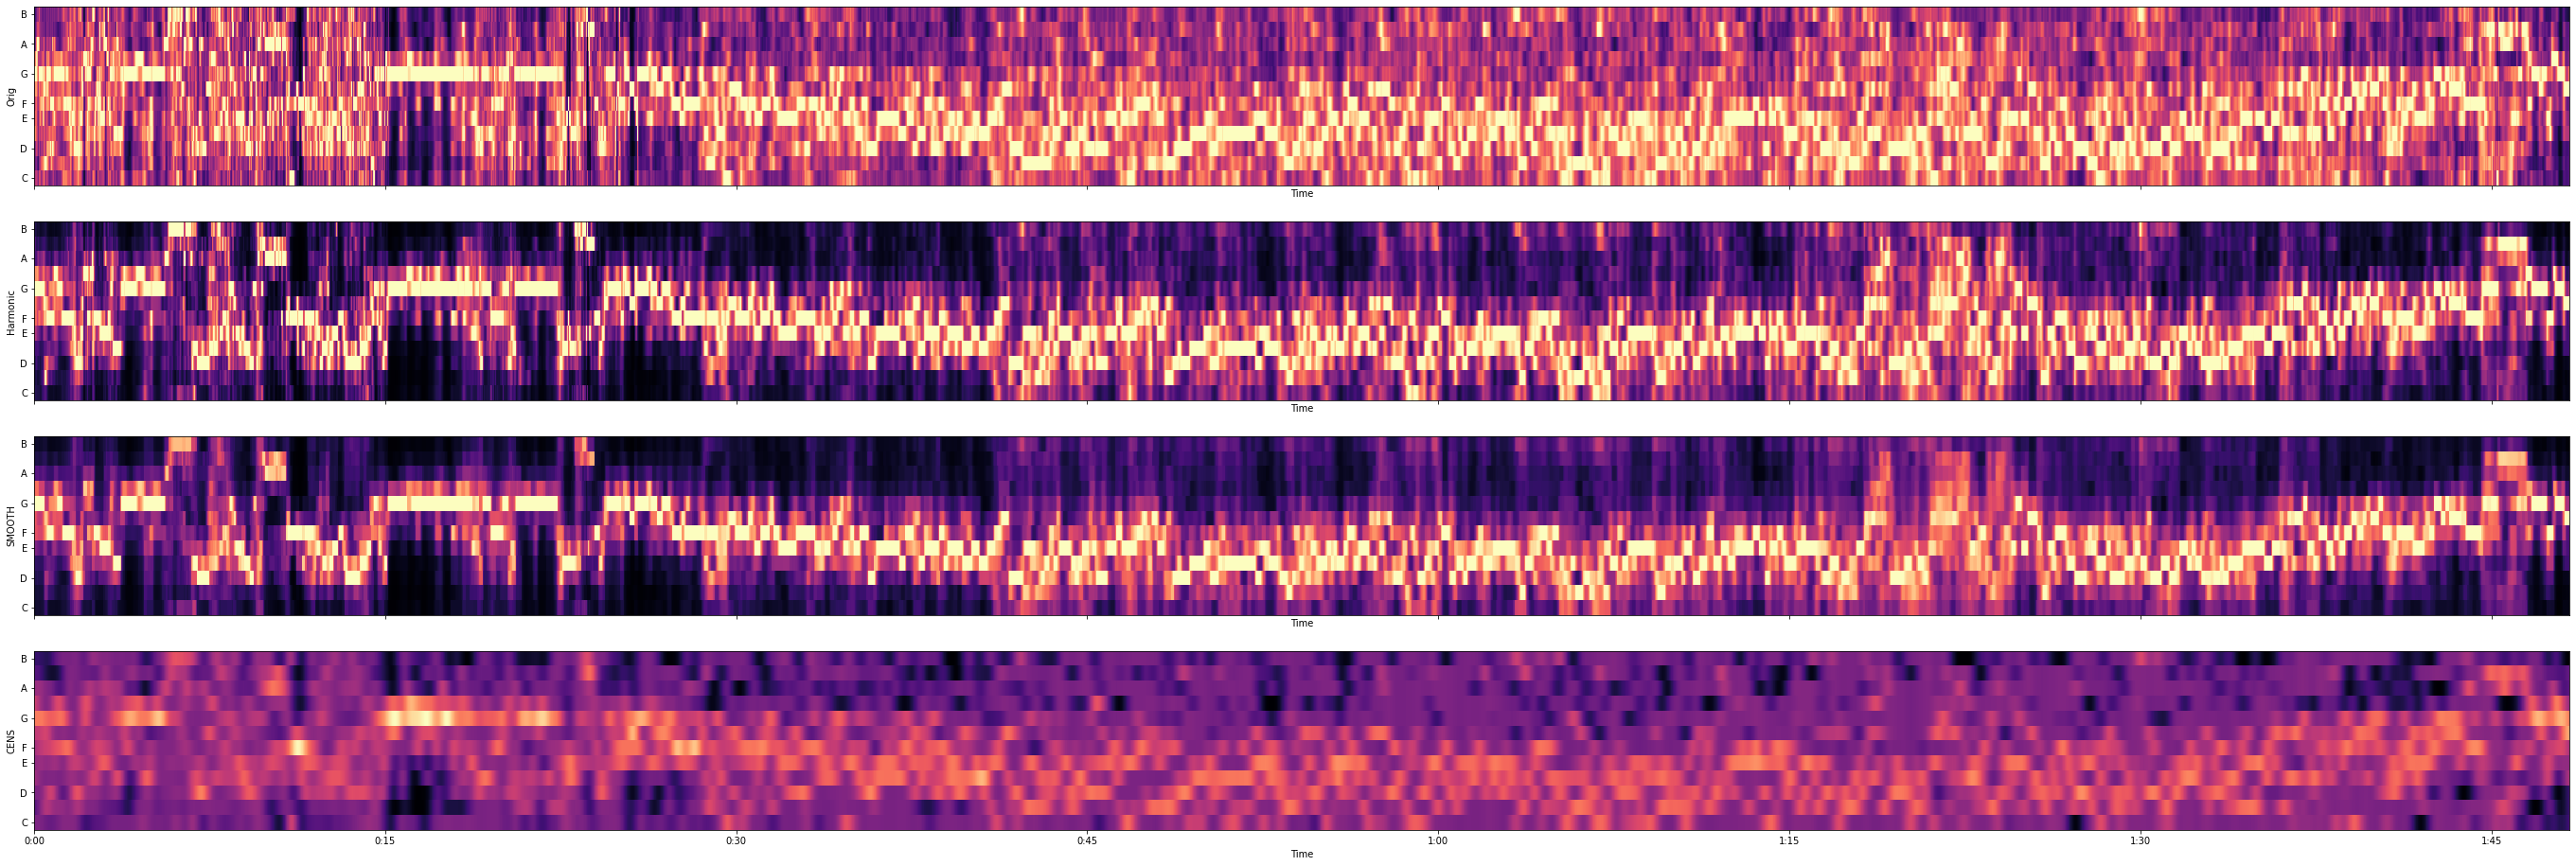

BECKER-WIEDEMANN_Uli-6_short.wav


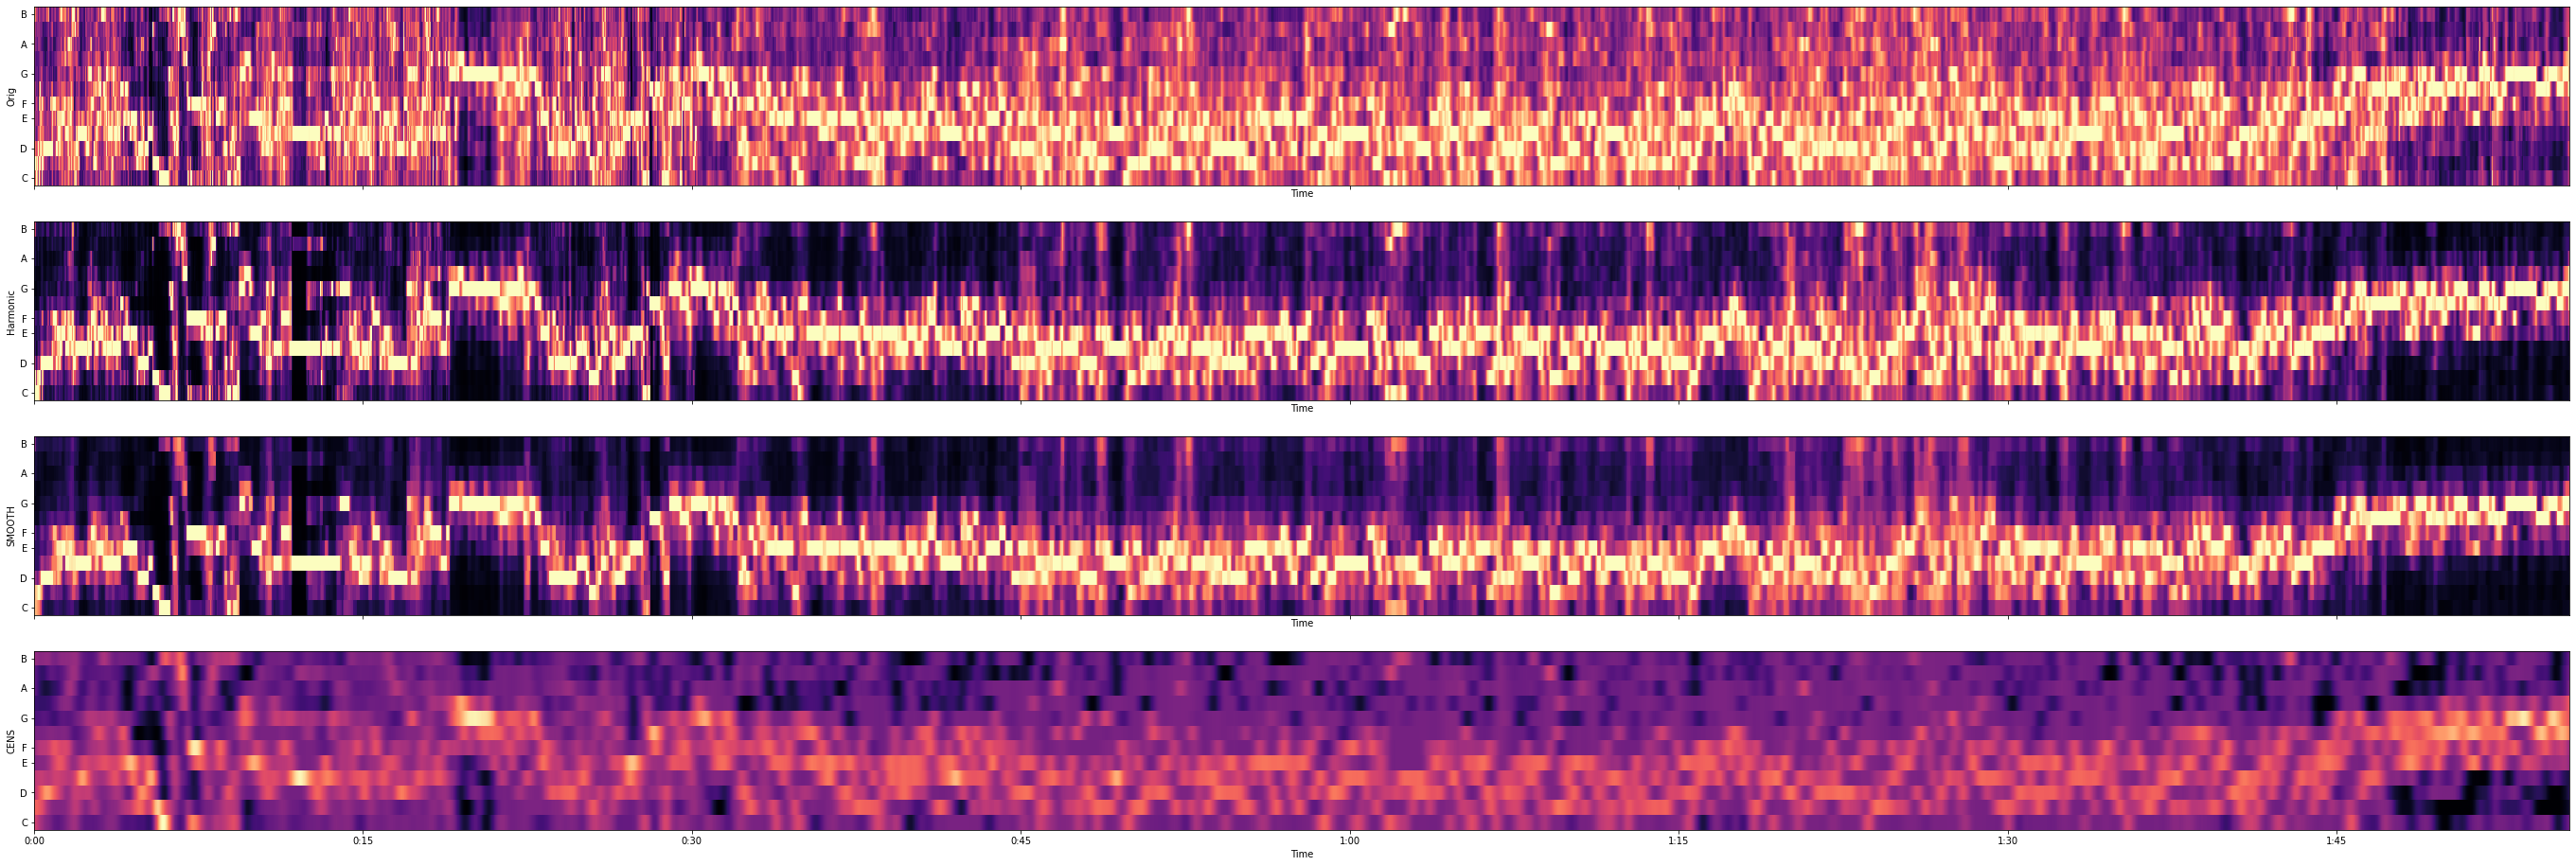

In [46]:
def display_chroma(filepath):
    print(filepath.split("/")[-1])
    y, sr = librosa.load(filepath)
    idx = [slice(None), slice(*list(librosa.time_to_frames([0, len(y)])))]

    chromagram_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

    y_harm = librosa.effects.harmonic(y=y, margin=8)
    chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr)
    chroma_filter = np.minimum(chroma_harm,
                            librosa.decompose.nn_filter(chroma_harm,
                                                        aggregate=np.median,
                                                        metric='cosine'))

    chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

    chromagram_cens = librosa.feature.chroma_cens(y=y, sr=sr)


    fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(48, 16))
    librosa.display.specshow(chromagram_cqt[idx], y_axis='chroma', x_axis='time', ax=ax[0])
    ax[0].set(ylabel='Orig')

    librosa.display.specshow(chroma_harm[idx], y_axis='chroma', x_axis='time', ax=ax[1])
    ax[1].set(ylabel='Harmonic')

    librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time', ax=ax[2])
    ax[2].set(ylabel='SMOOTH')

    librosa.display.specshow(chromagram_cens[idx], y_axis='chroma', x_axis='time', ax=ax[3])
    ax[3].set(ylabel='CENS')
    plt.show()

files = ["./data/BECKER-WIEDEMANN_Uli-2_short.wav", "./data/BECKER-WIEDEMANN_Uli-6_short.wav"]

for file in ["./data/BECKER-WIEDEMANN_Uli-2_short.wav", "./data/BECKER-WIEDEMANN_Uli-6_short.wav"]:
    display_chroma(file)